# Route Dataframe to HTML TABLE

In [46]:
import pandas as pd
import psycopg2
import psycopg2.extras
from flask import Flask
from flask import render_template
import datetime
import seaborn as s

In [2]:
# Read sqlite query results into a pandas DataFrame
con = psycopg2.connect(
    host = "127.0.0.1",
    database = "earthquakes",
    user = "postgres",
    password = "2544",
    port="5432"
)

db_cursor = con.cursor()

In [3]:
# ------------------
# Query and store in dataframe
# ------------------

def create_pandas_table(sql_query, database = con):
    table = pd.read_sql_query(sql_query, database)
    return table

# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
quake_info = create_pandas_table("SELECT * from earthquake LIMIT 10")
quake_info.head()

,date,time,lat,lon,type,depth,d_err,d_seis,magnitude,m_type,...,m_3,azimuth,horiz,horiz2,rm,id,source,location,m_source,status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,None,None,6.0,MW,...,None,None,None,None,None,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,None,None,5.8,MW,...,None,None,None,None,None,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,None,None,6.2,MW,...,None,None,None,None,None,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,None,None,5.8,MW,...,None,None,None,None,None,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,None,None,5.8,MW,...,None,None,None,None,None,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
# PUSH to HTML for ez codez
# --------------
html = quake_info.to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>date</th>
      <th>time</th>
      <th>lat</th>
      <th>lon</th>
      <th>type</th>
      <th>depth</th>
      <th>d_err</th>
      <th>d_seis</th>
      <th>magnitude</th>
      <th>m_type</th>
      <th>m_2</th>
      <th>m_3</th>
      <th>azimuth</th>
      <th>horiz</th>
      <th>horiz2</th>
      <th>rm</th>
      <th>id</th>
      <th>source</th>
      <th>location</th>
      <th>m_source</th>
      <th>status</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1/2/1965</td>
      <td>13:44:18</td>
      <td>19.246</td>
      <td>145.616</td>
      <td>Earthquake</td>
      <td>131.6</td>
      <td>None</td>
      <td>None</td>
      <td>6.0</td>
      <td>MW</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>ISCGEM860706</td>
      <td>ISCGEM</td>
      <td>ISCGEM

In [6]:
# create clean dataframe from full data
# --------------
quake_full = create_pandas_table("SELECT * from earthquake")
quake_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       23412 non-null  object 
 1   time       23412 non-null  object 
 2   lat        23412 non-null  float64
 3   lon        23412 non-null  float64
 4   type       23412 non-null  object 
 5   depth      23412 non-null  float64
 6   d_err      4461 non-null   object 
 7   d_seis     7097 non-null   object 
 8   magnitude  23412 non-null  float64
 9   m_type     23409 non-null  object 
 10  m_2        327 non-null    object 
 11  m_3        2564 non-null   object 
 12  azimuth    7299 non-null   object 
 13  horiz      1604 non-null   object 
 14  horiz2     1156 non-null   object 
 15  rm         17352 non-null  object 
 16  id         23412 non-null  object 
 17  source     23412 non-null  object 
 18  location   23412 non-null  object 
 19  m_source   23412 non-null  object 
 20  status

In [40]:
# reduce new df
# --------------
quake_reduced = quake_full[["date", "lat", "lon", "depth", "magnitude", "id"]]
quake_reduced.head()

,date,lat,lon,depth,magnitude,id
0,1/2/1965,19.246,145.616,131.6,6.0,ISCGEM860706
1,1/4/1965,1.863,127.352,80.0,5.8,ISCGEM860737
2,1/5/1965,-20.579,-173.972,20.0,6.2,ISCGEM860762
3,1/8/1965,-59.076,-23.557,15.0,5.8,ISCGEM860856
4,1/9/1965,11.938,126.427,15.0,5.8,ISCGEM860890


In [41]:
# parse date column to datetime object
quake_reduced['date'] = pd.to_datetime(quake_reduced['date'], utc=True)
quake_reduced['year'] = pd.DatetimeIndex(quake_reduced['date']).year

quake_reduced.head()

C:\Users\18586\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\18586\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,lat,lon,depth,magnitude,id,year
0,1965-01-02 00:00:00+00:00,19.246,145.616,131.6,6.0,ISCGEM860706,1965
1,1965-01-04 00:00:00+00:00,1.863,127.352,80.0,5.8,ISCGEM860737,1965
2,1965-01-05 00:00:00+00:00,-20.579,-173.972,20.0,6.2,ISCGEM860762,1965
3,1965-01-08 00:00:00+00:00,-59.076,-23.557,15.0,5.8,ISCGEM860856,1965
4,1965-01-09 00:00:00+00:00,11.938,126.427,15.0,5.8,ISCGEM860890,1965


In [42]:
quake_reduced['year'].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [66]:
# number of recorded quakes per year
q_bar = quake_reduced.groupby("year")["id"].count()
q_mag = quake_reduced.groupby("year")["magnitude"].mean()

#store in summary df
q_counts = pd.DataFrame(q_bar)
q_counts.reset_index(inplace=True)
q_counts.head()

,year,id
0,1965,339
1,1966,234
2,1967,255
3,1968,305
4,1969,323


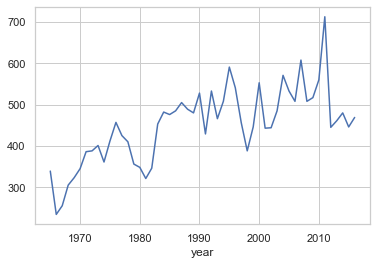

In [64]:
quake_reduced.groupby(['year'])['id'].count().plot()


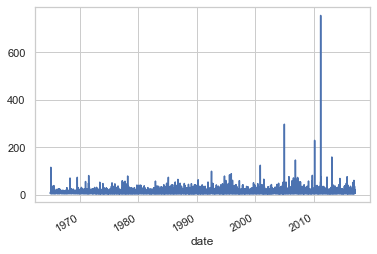

In [65]:
quake_reduced.groupby(['date'])['magnitude'].sum().plot()

# Create Top-10 most active Dates 

In [73]:
daily_quakes = quake_reduced.groupby('date').agg({'id': 'count', 'magnitude': 'sum'})
daily_quakes.reset_index(inplace=True)

daily_quakes.head()

,date,id,magnitude
0,1965-01-02 00:00:00+00:00,1,6.0
1,1965-01-04 00:00:00+00:00,1,5.8
2,1965-01-05 00:00:00+00:00,1,6.2
3,1965-01-08 00:00:00+00:00,1,5.8
4,1965-01-09 00:00:00+00:00,1,5.8


In [84]:
daily_quakes = daily_quakes.sort_values(by='id', ascending=False)
daily_quakes

,date,id,magnitude
10968,2011-03-11 00:00:00+00:00,128,755.5
9335,2004-12-26 00:00:00+00:00,51,297.3
10694,2010-02-27 00:00:00+00:00,39,229.4
11459,2013-02-06 00:00:00+00:00,27,159.1
9816,2006-11-15 00:00:00+00:00,25,146.3
...,...,...,...
5141,1988-04-05 00:00:00+00:00,1,5.8
637,1968-08-04 00:00:00+00:00,1,6.1
8551,2001-12-05 00:00:00+00:00,1,5.7
11872,2014-10-22 00:00:00+00:00,1,5.8


In [99]:
top_10 = daily_quakes[0:10]
top_10

,date,id,magnitude
10968,2011-03-11 00:00:00+00:00,128,755.5
9335,2004-12-26 00:00:00+00:00,51,297.3
10694,2010-02-27 00:00:00+00:00,39,229.4
11459,2013-02-06 00:00:00+00:00,27,159.1
9816,2006-11-15 00:00:00+00:00,25,146.3
8287,2000-11-16 00:00:00+00:00,21,124.3
10969,2011-03-12 00:00:00+00:00,21,121.4
14,1965-02-04 00:00:00+00:00,19,115.7
6203,1992-07-18 00:00:00+00:00,17,99.1
7075,1995-12-03 00:00:00+00:00,15,88.8


In [100]:
top_10 = top_10.sort_values(by='date', ascending=True)

In [101]:
top_10

,date,id,magnitude
14,1965-02-04 00:00:00+00:00,19,115.7
6203,1992-07-18 00:00:00+00:00,17,99.1
7075,1995-12-03 00:00:00+00:00,15,88.8
8287,2000-11-16 00:00:00+00:00,21,124.3
9335,2004-12-26 00:00:00+00:00,51,297.3
9816,2006-11-15 00:00:00+00:00,25,146.3
10694,2010-02-27 00:00:00+00:00,39,229.4
10968,2011-03-11 00:00:00+00:00,128,755.5
10969,2011-03-12 00:00:00+00:00,21,121.4
11459,2013-02-06 00:00:00+00:00,27,159.1


In [102]:
top_10['date'] = pd.to_datetime(top_10['date']).dt.date
top_10

,date,id,magnitude
14,1965-02-04,19,115.7
6203,1992-07-18,17,99.1
7075,1995-12-03,15,88.8
8287,2000-11-16,21,124.3
9335,2004-12-26,51,297.3
9816,2006-11-15,25,146.3
10694,2010-02-27,39,229.4
10968,2011-03-11,128,755.5
10969,2011-03-12,21,121.4
11459,2013-02-06,27,159.1


In [103]:
top_10.to_csv(r'top_10.csv', index = False)